### Question 7

### Solution

Let:

$n$ be the number of companies

$\bar{c} \in R^n$ be the expected returns

$\Sigma \in S^n$ the covariance matrix

$P_v \in R$ be the overall portfolio variance

$x \in R^n$ be the weights in each stock

$h \in R$ be the minimum return


---

$\displaystyle \begin{align*}P_v &= \sum_{i=1}^n\sum_{j=1}^nx_ix_j\Sigma_{ij}\\
&= \sum_{i,j=0}^n (x^Tx \circ \Sigma)_{ij}\\
&= x^T\Sigma x
\end{align*}$


$\begin{align*}
\text{minimize }& x^T\Sigma x\\
\text{subject to } &\bar{c}^Tx \ge h\\
&\mathbf{1}^Tx=1\\
&x \ge \mathbf{0}
\end{align*}$

---


In [119]:
company_names = np.array(['IBM', 'Google', 'Apple', 'Intel'])
c_bar = np.array( [1.1, 1.35, 1.25, 1.05])[:, np.newaxis]

covar = np.array([[0.2, -0.2, -0.12, 0.02],
[-0.2, 1.4, 0.02, 0],
[-0.12, 0.02, 1, -0.4],
[0.02, 0, -0.4, 0.2]])

In [104]:
import cvxpy as cvx
import numpy as np
import matplotlib.pyplot as plt

def portfolio_by_minimum_return(min_return):
    x = cvx.Variable(4, 1)
    one = np.ones((4,1))
    cost = cvx.quad_form(x, covar)

    obj = cvx.Minimize(cost)
    constraints = [c_bar.T @ x >= min_return, one.T @ x == 1, x >= 0]

    prob = cvx.Problem(obj, constraints)

    return np.concatenate([np.array([prob.solve()]), x.value])
    
portfolio_by_minimum_return(1.35)

array([ 1.40000000e+00, -1.48795065e-14,  1.00000000e+00,  2.60827550e-12,
       -2.08827609e-14])

### Solution (Q.7b)



**Additional Note:**

Risk return tradeoff is commonly measured by the Sharpe Ratio

$Sharp = \frac{\bar{r} - r_f}{\sigma_p}$

Where

$\begin{align*}
&\bar{r} = \text{Expected portfolio return}\\
&r_f = \text{Risk Free Rate}\\
&\sigma_p = \text{Portfolio Standard deviation}
\end{align*}$

Risk Free rate is typically the 30 year treasury rate, [which is currently 0.0299](https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield)


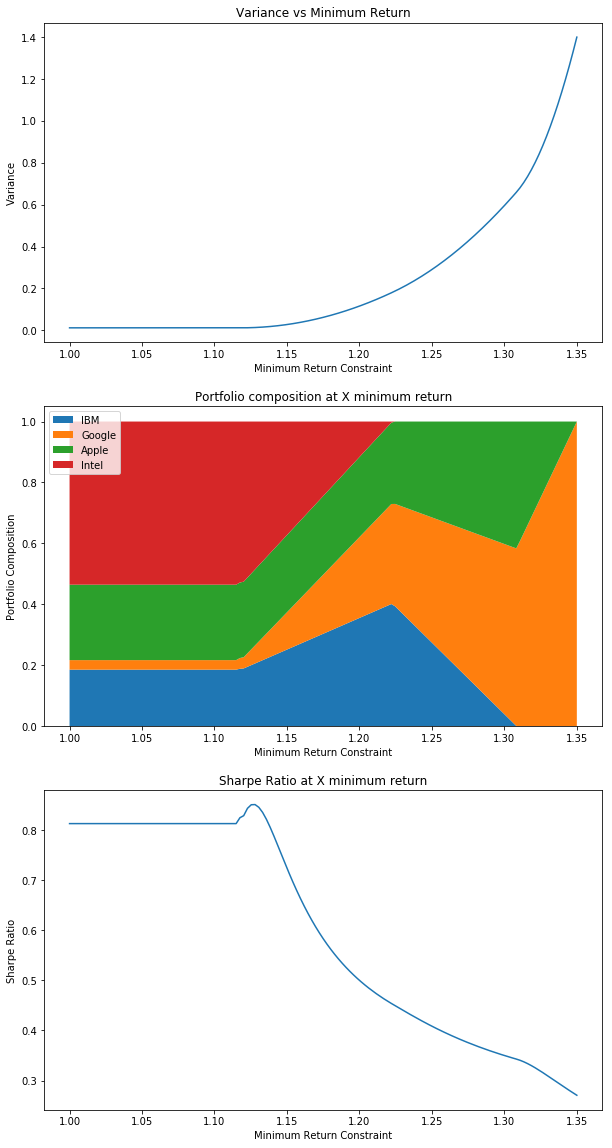

In [151]:
# portfolio_by_minimum_return()

def plot_var_return_tradeoff():
    x = np.linspace(1.0, 1.35, 135)
    port_func = np.vectorize(portfolio_by_minimum_return, otypes=[np.ndarray])
    y = np.stack(port_func(x))
    
    fig = plt.figure(figsize=(10, 20))
    ax = fig.add_subplot(311)
    ax.plot(x, y[:, 0])
    ax.set_title("Variance vs Minimum Return")
    ax.set_ylabel("Variance")
    ax.set_xlabel("Minimum Return Constraint")
    
    ax = fig.add_subplot(312)
    ax.stackplot(x, y[:, 1], y[:, 2], y[:, 3], y[:, 4], labels=company_names)
    ax.legend(loc=2)
    ax.set_title("Portfolio composition at X minimum return")
    ax.set_ylabel("Portfolio Composition")
    ax.set_xlabel("Minimum Return Constraint")

    
    weights = y[:, 1:]
    alpha = (weights @ c_bar) - 1.0299
    sharpe = alpha / np.sqrt(np.expand_dims(y[:, 0], 1))

    ax = fig.add_subplot(313)
    ax.plot(x, sharpe)
    ax.set_title("Sharpe Ratio at X minimum return")
    ax.set_ylabel("Sharpe Ratio")
    ax.set_xlabel("Minimum Return Constraint")

    
plot_var_return_tradeoff()